In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-prices-2015-2025/nflx_prices.csv
/kaggle/input/netflix-prices-2015-2025/nflx_strategy_outputs.csv


In [2]:
import pandas as pd

prices = pd.read_csv("/kaggle/input/netflix-prices-2015-2025/nflx_strategy_outputs.csv")

In [3]:
prices.head()

,Unnamed: 0,Date,Price,Return,Realized_Vol,ma_50,Signal,regime_id,Raw_Position,Position,Position_lag,PnL,cumu_PnL
0,0,2015-01-02,4.984857,NaN,NaN,NaN,0,0.0,NaN,0.0,NaN,0.0,0.0
1,1,2015-01-05,4.731143,-0.050897,NaN,NaN,0,0.0,NaN,0.0,0.0,-0.0,0.0
2,2,2015-01-06,4.650143,-0.017121,NaN,NaN,0,0.0,NaN,0.0,0.0,-0.0,0.0
3,3,2015-01-07,4.674286,0.005192,NaN,NaN,0,0.0,NaN,0.0,0.0,0.0,0.0
4,4,2015-01-08,4.778000,0.022188,NaN,NaN,0,0.0,NaN,0.0,0.0,0.0,0.0


In [4]:
prices[['PnL', 'cumu_PnL', 'Position', 'Signal']].describe()

,PnL,cumu_PnL,Position,Signal
count,2763.000000,2763.000000,2763.000000,2763.000000
mean,0.000235,0.449156,0.208841,0.643865
std,0.006105,0.203789,0.184118,0.478942
min,-0.047751,-0.013429,0.000000,0.000000
25%,-0.001216,0.296936,0.000000,0.000000
50%,0.000000,0.477003,0.213051,1.000000
75%,0.001504,0.570345,0.364201,1.000000
max,0.068224,0.809548,0.857869,1.000000


In [5]:
#annualized return
annual_return = prices['PnL'].mean() * 252
annual_return

np.float64(0.05926778066316072)

In [6]:
#annualized volatility
annual_vol = prices['PnL'].std() * np.sqrt(252)
annual_vol

np.float64(0.09691732015836978)

In [7]:
#Calculating Sharpe Ratio
sharpe = annual_return / annual_vol
sharpe

np.float64(0.6115292969957584)

In [8]:
#Calculating Drawdown
cum = prices['cumu_PnL']
running_max = cum.cummax()
drawdown = cum - running_max

prices['drawdown'] = drawdown

In [9]:
#Max Drawdown
max_dd = drawdown.min()
max_dd

-0.15971931247540916

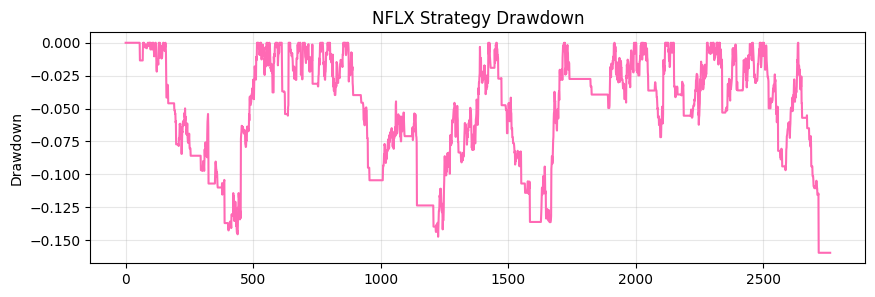

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.plot(prices.index, prices['drawdown'], color='hotpink')
plt.title("NFLX Strategy Drawdown")
plt.ylabel("Drawdown")
plt.grid(alpha=0.3)
plt.show()

In [11]:
time_in_market = prices['Signal'].mean()
time_in_market

np.float64(0.6438653637350705)

In [12]:
prices.groupby('Signal')['PnL'].mean() * 252

Signal
0   -0.266311
1    0.239352
Name: PnL, dtype: float64